In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import numpy as np



In [2]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### Lets start with some preprocessing

In [4]:
df_filled = df.fillna(df.mean())

In [5]:
missing_values_after = df_filled.isnull().sum() # To check if there are any missing values remaining
non_numeric_columns = df_filled.select_dtypes(include=['object']).columns
missing_values_after


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
crim = df_filled['CRIM']
zn = df_filled['ZN']
indus = df_filled['INDUS']
chas= df_filled['CHAS']
nox= df_filled['NOX']
rm= df_filled['RM']
age= df_filled['AGE']
dis= df_filled['DIS']
rad= df_filled['RAD']
tax= df_filled['TAX']
ptratio= df_filled['PTRATIO']
b= df_filled['B']
lstat= df_filled['LSTAT']
medv= df_filled['MEDV']

df_filled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


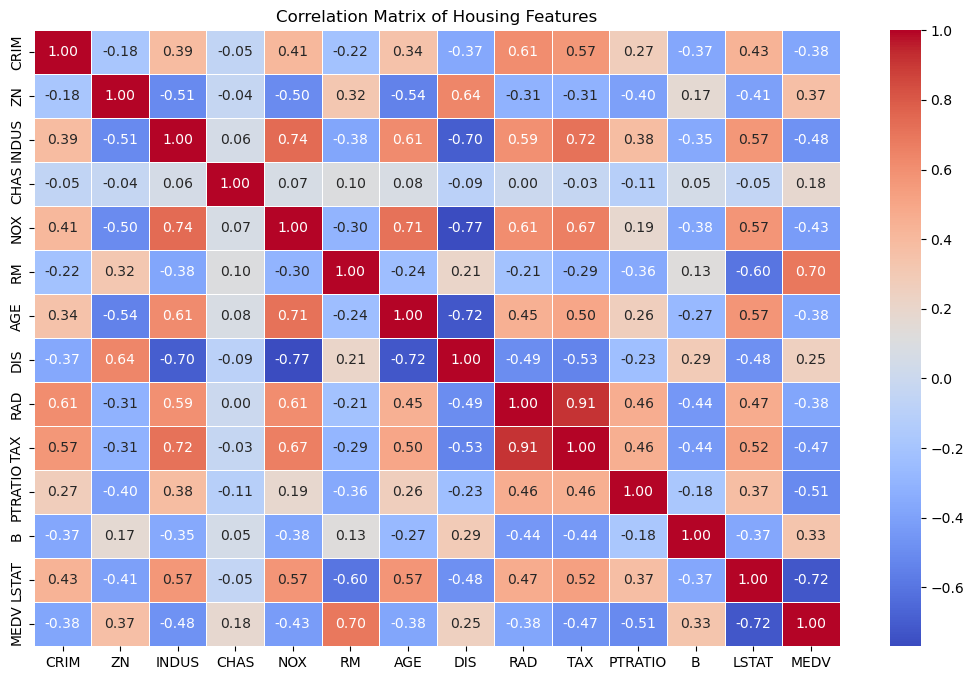

In [21]:


# Compute the correlation matrix
correlation_matrix = df_filled.corr()

# Set up the matplotlib figure
plt.figure(figsize=(13, 8)) # for the dimensions

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add titles and labels for clarity
plt.title('Correlation Matrix of Housing Features')
plt.show()

- High Positive Correlation: 
    - Features with strong positive correlations (coefficients close to 1) might represent redundant information. For example, TAX and RAD (accessibility to radial highways and property-tax rate) often show high correlation in housing datasets, implying that areas with better highway access tend to have higher taxes.
- High Negative Correlation: 
    - A strong negative correlation (coefficients close to -1) indicates that as one feature increases, the other decreases. For instance, if DIS (distances to employment centres) and NOX (nitric oxides concentration) were highly negatively correlated, it would suggest that properties closer to employment centres have higher pollution levels.
- Weak or No Correlation: 
    - Coefficients near 0 indicate a weak or no linear relationship. Such features independently contribute to the outcome variable, suggesting they provide unique information.

In [27]:
# Identify pairs of features with high correlation coefficients
high_corr_pairs = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_pairs = high_corr_pairs.stack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_features = high_corr_pairs[(high_corr_pairs['Correlation'] > 0.7) | (high_corr_pairs['Correlation'] < -0.7)]

high_corr_features


,Feature1,Feature2,Correlation
26,INDUS,NOX,0.740965
31,INDUS,TAX,0.716062
47,NOX,AGE,0.711461
48,NOX,DIS,-0.769230
63,AGE,DIS,-0.724353
76,RAD,TAX,0.910228
90,LSTAT,MEDV,-0.721975


- INDUS (proportion of non-retail business acres per town) and NOX (nitric oxides concentration): Correlation of 0.740965 suggests that industrial areas tend to have higher pollution levels.

- INDUS and TAX (full-value property-tax rate per $10,000): Correlation of 0.716062 indicates that industrial areas may also be associated with higher tax rates.

- NOX and AGE (proportion of owner-occupied units built prior to 1940): Correlation of 0.711461 suggests older areas have higher levels of NOX, possibly due to older construction materials or proximity to industrial areas.

- NOX and DIS (weighted distances to five Boston employment centres): Correlation of -0.769230 indicates that higher pollution levels are found in areas closer to employment centres.

- AGE and DIS: Correlation of -0.724353 suggests older housing is closer to employment centres.

- RAD (index of accessibility to radial highways) and TAX: Correlation of 0.910228 is very high, indicating that areas with better highway access are associated with higher tax rates.

- LSTAT (% lower status of the population) and MEDV (Median value of owner-occupied homes): Correlation coefficient of -0.723. A higher percentage of lower-status population is strongly negatively correlated with the value of homes, reflecting socio-economic impacts on housing prices.


# Removing Features
Remove NOX over INDUS because INDUS could have a broader impact on the model due to its association with both tax rates and pollution.

Remove RAD over TAX if we consider TAX might have a more direct impact on housing prices.

Between LSTAT and MEDV, both are crucial, but since our goal is often to predict MEDV, keeping LSTAT could be more beneficial due to its strong predictive power.